In [1]:
from autogluon.tabular import TabularDataset, TabularPredictor

# import pandas
import pandas as pd

# import train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer


# Previsão da Pedra-conceito

In [83]:
data = pd.read_csv("../data/df_pooled_common.csv")
data.head()


,nome,ida,diff_fase,ponto_virada_encoded,anos_pm,bolsista_encoded,ipv,corraca,ponto_virada,ian,...,ips,ieg,ipp,idade,sexo_encoded,fase,inde,sexo,na_fase,ano
0,ALUNO-1,7.000000,0.0,0,2.0,0,7.750000,R,Não,10.0,...,7.500,8.7,5.9375,11.0,1.0,2,7.883752,F,1,2020
1,ALUNO-3,5.500000,0.0,0,2.0,0,8.111113,B,Não,10.0,...,7.500,8.9,8.1250,12.0,1.0,3,7.856390,F,1,2020
2,ALUNO-4,0.000000,-1.0,0,2.0,0,7.750000,R,Não,5.0,...,6.875,4.1,7.1875,10.0,0.0,1,5.076252,M,0,2020
3,ALUNO-5,7.500000,0.0,0,1.0,0,8.166665,R,Não,10.0,...,7.500,8.0,8.4375,10.0,0.0,2,8.077085,M,1,2020
4,ALUNO-8,7.333333,0.0,1,3.0,1,8.944450,R,Sim,10.0,...,4.375,9.9,8.7500,14.0,1.0,4,8.381391,F,1,2020


In [84]:
data.dtypes


nome                     object
ida                     float64
diff_fase               float64
ponto_virada_encoded      int64
anos_pm                 float64
bolsista_encoded          int64
ipv                     float64
corraca                  object
ponto_virada             object
ian                     float64
pedra                    object
pedra_encoded             int64
iaa                     float64
ips                     float64
ieg                     float64
ipp                     float64
idade                   float64
sexo_encoded            float64
fase                      int64
inde                    float64
sexo                     object
na_fase                   int64
ano                       int64
dtype: object

In [86]:
# converts 'ian' to category
data["ian"] = data["ian"].astype("category")

# converts 'sexo' to category
data["sexo"] = data["sexo"].astype("category")

# converts 'pedra' to category
data["pedra"] = data["pedra"].astype("category")

# converts 'ponto_virada' to category
data["ponto_virada"] = data["ponto_virada"].astype("category")

# converts 'fase' to category
data["fase"] = data["fase"].astype("category")

# converts 'na_fase' to boolean
data["na_fase"] = data["na_fase"].astype(bool)

# converts bolsista_encoded to boolean
data["bolsista_encoded"] = data["bolsista_encoded"].astype(bool)

# maps ano to t,t+1,t+2
data["ano"] = data["ano"].apply(
    lambda x: "t0" if x == 2020 else ("t1" if x == 2021 else "t2")
)
data["ano"] = data["ano"].astype("category")


In [76]:
data = data.drop(columns=["pedra_encoded", "nome", "corraca", "sexo_encoded"])
data.head()


,ida,diff_fase,ponto_virada_encoded,anos_pm,bolsista_encoded,ipv,corraca,ponto_virada,ian,pedra,...,ips,ieg,ipp,idade,sexo_encoded,fase,inde,sexo,na_fase,ano
0,7.000000,0.0,0,2.0,0,7.750000,R,Não,10.0,Ametista,...,7.500,8.7,5.9375,11.0,1.0,2,7.883752,F,1,t0
1,5.500000,0.0,0,2.0,0,8.111113,B,Não,10.0,Ametista,...,7.500,8.9,8.1250,12.0,1.0,3,7.856390,F,1,t0
2,0.000000,-1.0,0,2.0,0,7.750000,R,Não,5.0,Quartzo,...,6.875,4.1,7.1875,10.0,0.0,1,5.076252,M,0,t0
3,7.500000,0.0,0,1.0,0,8.166665,R,Não,10.0,Ametista,...,7.500,8.0,8.4375,10.0,0.0,2,8.077085,M,1,t0
4,7.333333,0.0,1,3.0,1,8.944450,R,Sim,10.0,Ametista,...,4.375,9.9,8.7500,14.0,1.0,4,8.381391,F,1,t0


In [77]:
# Selecionar as variáveis preditoras e a variável alvo
# no lugar de eliminar o ano, será que daria para usar uma espécie de nota no ano t, nota no ano t+1, nota em t + 2?
X = data.drop(columns=["pedra", "inde"])

# features com importância
X = X[["ida", "ieg", "ipv", "ano", "iaa", "ian", "ipp", "ips", "na_fase"]]

X_train, X_test, y_train, y_test = train_test_split(
    X, data["pedra"], test_size=0.25, random_state=41, shuffle=True
)


In [78]:
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)


In [79]:
label = "pedra"
print("Summary of class variable: \n", train_data[label].describe())


Summary of class variable: 
 count         1688
unique           4
top       Ametista
freq           740
Name: pedra, dtype: object


In [80]:
print(X_train.describe())
print(y_train.describe())


               ida    diff_fase  ponto_virada_encoded      anos_pm  \
count  1688.000000  1686.000000           1688.000000  1688.000000   
mean      5.967858    -0.779953              0.148104     1.558649   
std       2.389013     0.827338              0.355309     1.513072   
min       0.000000    -5.000000              0.000000     0.000000   
25%       4.600000    -1.000000              0.000000     0.000000   
50%       6.333333    -1.000000              0.000000     1.000000   
75%       7.666667     0.000000              0.000000     3.000000   
max      10.000000     3.000000              1.000000     6.000000   

       bolsista_encoded          ipv          iaa          ips          ieg  \
count       1688.000000  1688.000000  1688.000000  1688.000000  1688.000000   
mean           0.152844     7.370089     8.279019     6.825563     7.570527   
std            0.359943     1.333416     1.988906     1.310618     2.097586   
min            0.000000     0.000000     0.000000    

In [82]:
save_path = "agModels-predictPedra"  # specifies folder to store trained models
predictor = TabularPredictor(
    label=label, path=save_path, problem_type="multiclass"
).fit(train_data, presets="good_quality", num_gpus=1)


Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.11.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Mar 29 23:14:13 UTC 2024
CPU Count:          16
Memory Avail:       2.06 GB / 15.49 GB (13.3%)
Disk Space Avail:   914.21 GB / 1006.85 GB (90.8%)
Presets specified: ['high_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Note: `save_bag_folds=False`! This will greatly reduce peak disk usage during fit (by ~8x), but runs the risk of an out-of-memory error during model refit if memory is small relative to the data size.
	You can avoid this risk by setting `save_bag_folds=True`.
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected

KeyboardInterrupt: 

In [59]:
y_test = test_data[label]  # values to predict
test_data_nolab = X_test  # delete label column to prove we're not cheating
test_data_nolab.head()


,ida,ieg,ipv,ano,iaa,ian,ipp,ips,na_fase
272,5.750000,10.000000,5.916675,t0,9.00002,10.0,2.50000,7.500,1
15,7.000000,9.300000,7.944443,t0,8.50002,5.0,8.12500,6.875,0
1815,5.166667,9.136364,8.277780,t2,9.16668,10.0,7.96875,5.625,1
387,9.000000,8.200000,8.333335,t0,9.50002,10.0,7.50000,6.250,1
1363,5.800000,7.200000,5.400000,t1,8.80000,10.0,6.70000,5.600,1


In [60]:
print(predictor.feature_metadata)


('category', [])  : 1 | ['ano']
('float', [])     : 7 | ['ida', 'ieg', 'ipv', 'iaa', 'ian', ...]
('int', ['bool']) : 1 | ['na_fase']


In [61]:
# predictor = TabularPredictor.load(
#     save_path
# )  # unnecessary, just demonstrates how to load previously-trained predictor from file

y_pred = predictor.predict(test_data_nolab)
print("Predictions:  \n", y_pred)
perf = predictor.evaluate_predictions(
    y_true=y_test, y_pred=y_pred, auxiliary_metrics=True
)


Predictions:  
 272     Ametista
15      Ametista
1815    Ametista
387     Ametista
1363       Ágata
          ...   
556     Ametista
491        Ágata
109      Quartzo
1121     Topázio
1976     Quartzo
Name: pedra, Length: 563, dtype: object


In [62]:
print(perf)


{'accuracy': 0.9733570159857904, 'balanced_accuracy': 0.9707682111093471, 'mcc': 0.9623450971251907}


In [63]:
results = predictor.fit_summary(show_plot=True)


*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2   0.964497    accuracy       0.266031  11.899483                0.001212           0.185602            2       True         14
1        NeuralNetTorch   0.955621    accuracy       0.013853   6.103059                0.013853           6.103059            1       True         12
2       NeuralNetFastAI   0.955621    accuracy       0.020655   4.486292                0.020655           4.486292            1       True          3
3            LightGBMXT   0.899408    accuracy       0.011768   2.676035                0.011768           2.676035            1       True          4
4              CatBoost   0.881657    accuracy       0.007869   7.135734                0.007869           7.135734            1       True          8
5        ExtraTreesEntr   0.8727

gio: file:///home/alien-wsl/projects/datathon_app/datathonapp/notebooks/agModels-predictPedraSummaryOfModels.html: Failed to find default application for content type ‘text/html’


In [64]:
predictor.feature_importance(test_data)


Computing feature importance via permutation shuffling for 9 features using 563 rows with 5 shuffle sets...


	30.54s	= Expected runtime (6.11s per shuffle set)
	4.82s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
ida,0.374423,0.021513,0.000001,5,0.418719,0.330127
ieg,0.323979,0.027419,0.000006,5,0.380435,0.267522
ipv,0.184014,0.009937,0.000001,5,0.204475,0.163553
ian,0.162700,0.013268,0.000005,5,0.190019,0.135381
ano,0.112611,0.012151,0.000016,5,0.137630,0.087592
iaa,0.105151,0.010234,0.000011,5,0.126224,0.084078
ips,0.069627,0.007884,0.000019,5,0.085859,0.053395
ipp,0.068917,0.007038,0.000013,5,0.083408,0.054425
na_fase,0.009591,0.005417,0.008343,5,0.020744,-0.001562


In [66]:
features_importance = predictor.feature_importance(test_data)


Computing feature importance via permutation shuffling for 9 features using 563 rows with 5 shuffle sets...
	36.75s	= Expected runtime (7.35s per shuffle set)
	8.19s	= Actual runtime (Completed 5 of 5 shuffle sets)


In [67]:
important_features = features_importance[features_importance < 0.05].index.to_list()
print(important_features)


['ida', 'ieg', 'ipv', 'ian', 'ano', 'iaa', 'ips', 'ipp', 'na_fase']


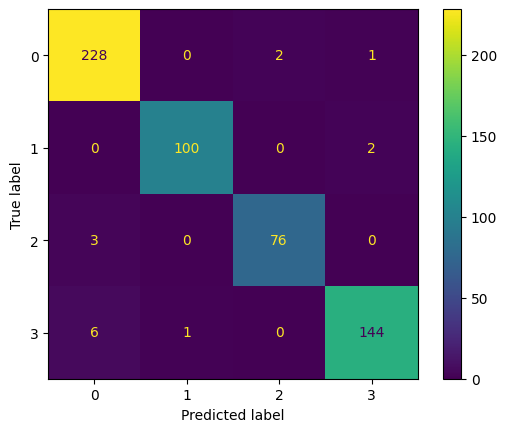

In [68]:
import matplotlib.pyplot as plt
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)

cm_display.plot()
plt.show()
